# Radar system

ver 0.3: Dec 2, 2018

Reference: 
- [Sound Synthesis with Numpy](https://dzone.com/articles/sound-synthesis-numpy)
- [Radar Pulse Compression](https://www.ittc.ku.edu/workshops/Summer2004Lectures/Radar_Pulse_Compression.pdf)

In [45]:
%matplotlib inline
%run ../lib/dsp.py
Fs=80_000_000.0/25/42  # Sampling frequency
NN=1024
Tc=NN/Fs # Chirp signal length
Ac=1000  # Chirp signal amplitude
S=340 # Speed of sound
setenv(figsize=(8,3), fs=Fs, real_only=True, grid=True)
Tc

0.01344

In [46]:
c = Chirp(f0=16000, f1=19000, T=Tc, A=Ac)

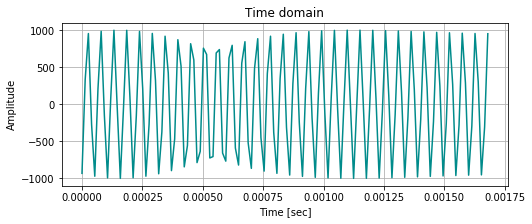

In [47]:
plot_wave(c.chirp_cos()[NN-128:NN])

Frequencies at peaks: [16443.45238095 18601.19047619] Hz


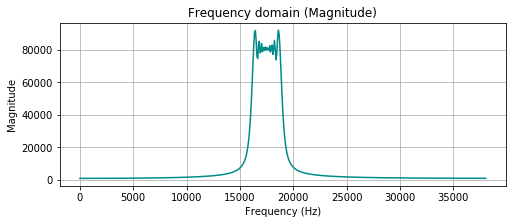

In [48]:
plot_fft(c.chirp_cos())

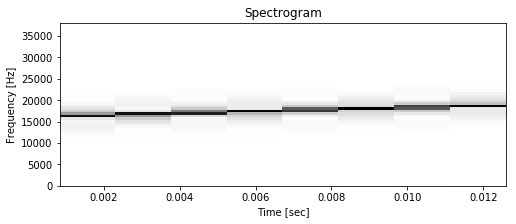

In [49]:
plot_spectrogram(c.chirp_cos(), nperseg=128, mode='magnitude', cmap='binary')

# Chirp compression

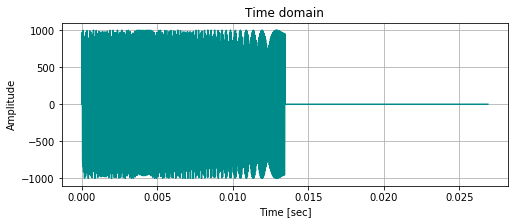

In [50]:
def compress(receive_buf, matched_filter):
    return sg.lfilter(matched_filter, 1, receive_buf)

def compress2(receive_buf, reference_buf):
    return ifft(fft(receive_buf) * fft(reference_buf)) 

receive_buf = buffer(Tc*2, c.chirp_cos())
matched_filter = c.chirp_cos(updown="down")
reference_buf = buffer(Tc*2, matched_filter)
plot_wave(receive_buf)

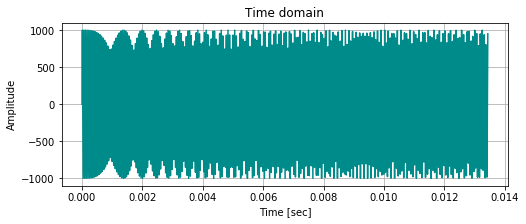

In [51]:
# Matched filter
plot_wave(matched_filter)

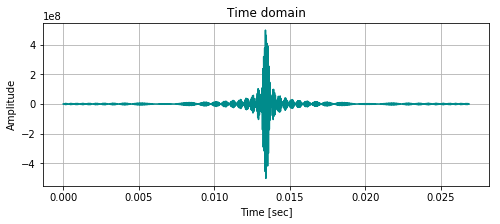

In [52]:
# Chirp compression
plot_wave(compress(receive_buf, matched_filter))

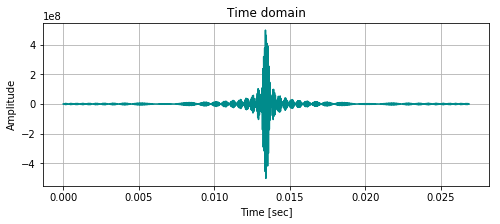

In [53]:
# Same calculation in frequency domain
plot_wave(compress2(receive_buf, reference_buf))

Frequencies at peaks: [0.] Hz


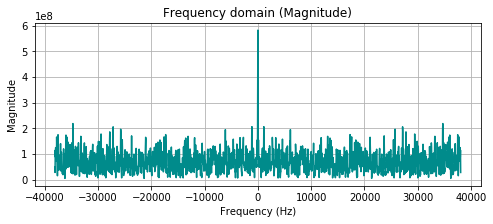

In [54]:
# Under white noise
receive_buf = buffer(Tc*2, c.chirp_cos() + np.real(c.white_noise(A=Ac*6)))
plot_fft(receive_buf*buffer(Tc*2, c.chirp_cos()), shift=True)

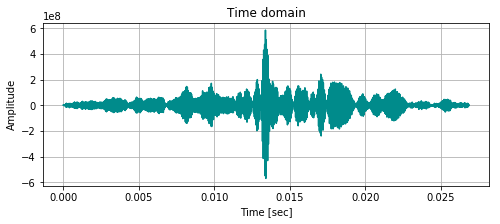

In [55]:
plot_wave(compress2(receive_buf, reference_buf))

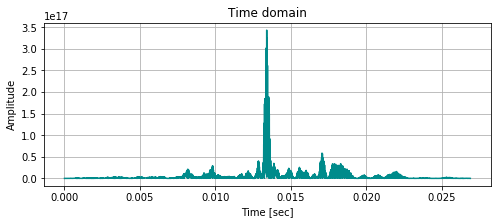

In [56]:
plot_wave(compress2(receive_buf, reference_buf)**2)

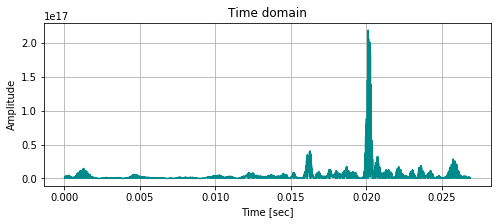

In [57]:
receive_buf = buffer(Tc*2, c.chirp_cos() + np.real(c.white_noise(A=Ac*6)), delay=Tc*0.5)
plot_wave(compress2(receive_buf, reference_buf)**2)

In [58]:
compressed = compress2(receive_buf, reference_buf)**2
distance = (np.argmax(compressed)-1024)/2/Fs*S
print("Distance: {}(m)".format(distance))

Distance: 1.133475(m)
